In [120]:
%matplotlib inline

In [121]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [122]:
#Files to load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [123]:
#Convert to dataframes
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [124]:
#Preview city data
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [125]:
#Preview ride data
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [126]:
#Merge city and ride dataframes
city_ride_complete_df = pd.merge(ride_data_df, city_data_df, on = "city")
city_ride_complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [127]:
#Check for holes in data
city_ride_complete_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

# Bubble Plot that showcases the relationship between:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [128]:
#Find unique values within "type"
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [129]:
#Find date range of data
ride_data_df["date"].min()

'2018-01-01 00:08:16'

In [130]:
ride_data_df["date"].max()

'2018-05-08 13:10:18'

In [106]:
#Obtain total number of Urban rides as the x axis
urban_df = city_ride_complete_df.loc[(city_ride_complete_df["type"]=="Urban")]
total_urban_rides = urban_df[["city", "ride_id"]].groupby("city").count()
total_urban_rides.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Carriemouth,27
Christopherfurt,27
Deanville,19


In [107]:
#Obtain total number of Suburban rides as the x axis
suburban_df = city_ride_complete_df.loc[(city_ride_complete_df["type"]=="Suburban")]
total_suburban_rides = suburban_df[["city", "ride_id"]].groupby("city").count()
total_suburban_rides.head()

,ride_id
city,
Barronchester,16
Bethanyland,18
Brandonfort,19
Colemanland,22
Davidfurt,17


In [108]:
#Obtain total number of Rural rides as the x axis
rural_df = city_ride_complete_df.loc[(city_ride_complete_df["type"]=="Rural")]
total_rural_rides = rural_df[["city", "ride_id"]].groupby("city").count()
total_rural_rides.head()

,ride_id
city,
Bradshawfurt,10
Garzaport,3
Harringtonfort,6
Jessicaport,6
Lake Jamie,6


In [109]:
#Obtain average Urban fares as the y axis
average_urban_fare = urban_df[["fare", "city"]].groupby("city").mean()
average_urban_fare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Carriemouth,28.314444
Christopherfurt,24.501852
Deanville,25.842632


In [110]:
#Obtain average Suburban fare as the y axis
average_suburban_fare = suburban_df[["fare", "city"]].groupby("city").mean()
average_suburban_fare.head()

,fare
city,
Barronchester,36.422500
Bethanyland,32.956111
Brandonfort,35.437368
Colemanland,30.894545
Davidfurt,31.995882


In [111]:
#Obtain average Rural fares as the y axis
average_rural_fare = rural_df[["fare", "city"]].groupby("city").mean()
average_rural_fare.head()

,fare
city,
Bradshawfurt,40.064000
Garzaport,24.123333
Harringtonfort,33.470000
Jessicaport,36.013333
Lake Jamie,34.358333


In [112]:
#Obtain total Urban drivers per city z axis
total_urban_drivers = urban_df.groupby(['city']).mean()
total_urban_drivers = total_urban_drivers["driver_count"]
total_urban_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [113]:
#Obtain total Suburban drivers per city z axis
total_suburban_drivers = suburban_df.groupby(['city']).mean()
total_suburban_drivers = total_suburban_drivers["driver_count"]
total_suburban_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [114]:
#Obtain total Rural drivers per city z axis
total_rural_drivers = rural_df.groupby(['city']).mean()
total_rural_drivers = total_rural_drivers["driver_count"]
total_rural_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

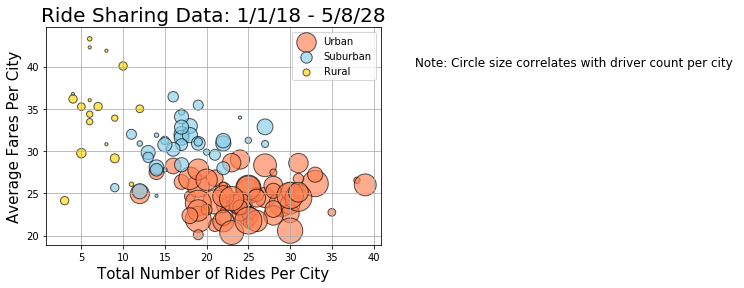

In [131]:
#Plot Bubbleplot
plt.scatter(total_urban_rides, average_urban_fare, s = total_urban_drivers*10, marker="o", facecolors="coral",
            edgecolors="black",alpha=0.65, label = 'Urban')

plt.scatter(total_suburban_rides, average_suburban_fare, s = total_suburban_drivers*10, marker="o", 
            facecolors="skyblue", edgecolors="black",alpha=0.65, label = 'Suburban')

plt.scatter(total_rural_rides, average_rural_fare, s= total_rural_drivers*10, facecolors="gold", edgecolors="black", 
            alpha=0.65, label ='Rural')

plt.grid(True)
plt.title("Ride Sharing Data: 1/1/18 - 5/8/28", size= 20)
plt.xlabel("Total Number of Rides Per City", size = 15)
plt.ylabel("Average Fares Per City", size = 15)
plt.legend(loc = "upper right")

textstr = "Note: Circle size correlates with driver count per city "
plt.text(45,40, textstr, fontsize=12)
plt.show()

# % of Total Fares by City Type Pie Chart

In [80]:
#Total Urban Fares
total_urban_fares = round(urban_df["fare"].sum(),2)
total_urban_fares

39854.38

In [81]:
#Total Suburban Fares
total_suburban_fares = round(suburban_df["fare"].sum(),2)
total_suburban_fares

19356.33

In [82]:
#Total_Rural_Fares
total_rural_fares = round(rural_df["fare"].sum(),2)
total_rural_fares

4327.93

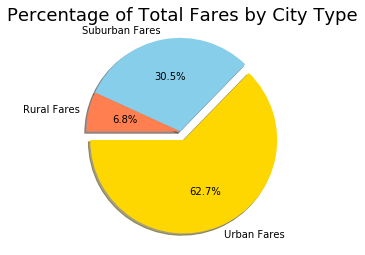

In [95]:
labels = ["Urban Fares", "Suburban Fares", "Rural Fares"]
sizes = [total_urban_fares, total_suburban_fares, total_rural_fares]
colors = ["gold", "skyblue", "coral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=900)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type", size = 18)
plt.show()

# % of Total Rides by City Type Pie Chart

In [84]:
urban_rides_pie = urban_df["ride_id"].count()
urban_rides_pie

1625

In [85]:
suburban_rides_pie = suburban_df["ride_id"].count()
suburban_rides_pie

625

In [86]:
rural_rides_pie = rural_df["ride_id"].count()
rural_rides_pie

125

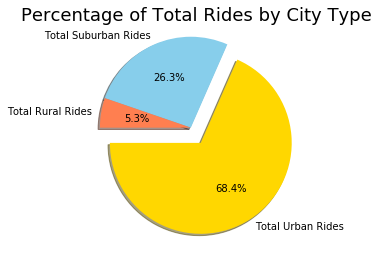

In [94]:
labels = ["Total Urban Rides", "Total Suburban Rides","Total Rural Rides"]
sizes = [urban_rides_pie, suburban_rides_pie, rural_rides_pie]
colors = ["gold", "skyblue", "coral"]
explode = (.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=900)
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type", size = 18)
plt.show()

## % of Total Drivers by City Type Pie Chart

In [88]:
#Total Urban Drivers
total_urban_drivers = urban_df.drop_duplicates("city")
total_urban_drivers = total_urban_drivers["driver_count"].sum()
total_urban_drivers

2405

In [89]:
#Total Suburban Drivers
total_suburban_drivers = suburban_df.drop_duplicates("city")
total_suburban_drivers = total_suburban_drivers["driver_count"].sum()
total_suburban_drivers

490

In [90]:
#Total Rural Drivers
total_rural_drivers = rural_df.drop_duplicates("city")
total_rural_drivers = total_rural_drivers["driver_count"].sum()
total_rural_drivers

78

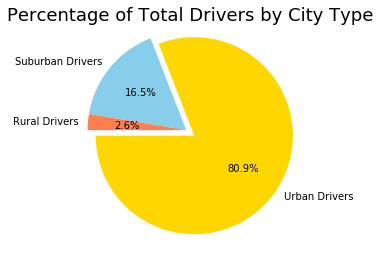

In [91]:
labels = ["Urban Drivers", "Suburban Drivers", "Rural Drivers"]
sizes = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]
colors = ["gold", "skyblue", "coral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=900)
plt.title("Percentage of Total Drivers by City Type", size = 18)
plt.axis("equal")
plt.show()

Three observerable trends: 

1. Although there are overall fewer rides in rural areas, the average cost of each rural ride is more expensive than urban or suburban areas, probably because rural passengers are traveling from further, more remote areas.  

2.  Those in urban areas are spending less per ride than their suburban and rural counterparts, but are travelling more often. It would be interesting to see the total amount spent versus number of rides taken per urban area. Are those in rural areas spending as much on longer rides as those in urban areas are spending on many shorter, less expensive rides on average per month?

3.  Urban areas are far and away the vast majority of people using this service.

4.  I'd also be curious to know of the total population of each city, what percentage are drivers for this rideshare service, and then compare that across all three city types.